In [1]:
# This is for installing model trees, that will be used at the end
!pip install --upgrade linear-tree

# More info about this implementation of model trees
# https://towardsdatascience.com/linear-tree-the-perfect-mix-of-linear-model-and-decision-tree-2eaed21936b7
# https://pypi.org/project/linear-tree/

# Install statsmodels for confidence intervals
!pip install statsmodels

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\ProgramData\Anaconda3\python.exe
3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


In [3]:
from sklearn import __version__ as myv
print(myv)

from statsmodels import __version__ as myv
print(myv)

1.1.1
0.13.2


# Using Python:
- Base Python (python without extra libraries): lists, dictionaries, sets, ...
- numpy: vectors and matrices with numbers
- pandas: data.frames

This is a list (base Python)

In [4]:
a = [1, 2, 3]
print(a)

[1, 2, 3]


This is a numpy vector and a numpy matrix. They can only contain numbers.

In [5]:
import numpy as np

print('This is a vector:')

a = np.array([1, 2, 3])
print(a)

print()

print('Ths is a matrix:')
b = np.array([[1,2,3], 
              [4,5,6]])
print(b)

This is a vector:
[1 2 3]

Ths is a matrix:
[[1 2 3]
 [4 5 6]]


This is a pandas dataframe. It can contain different columns, some of them with numbers, some of them with categorical values. 

In [6]:
import pandas as pd
pd.DataFrame({'a':[1,2,3], 'b':['a', 'b', 'c']})

,a,b
0,1,a
1,2,b
2,3,c


It looks that pandas dataframes are the appropriate data structure for representing data. However, scikit-learn can only use numpy matrices. Therefore, categorical values must be encoded as numbers. The typical workflow when working with scikit-learn is:
1. Load data as a Pandas dataframe
2. Do EDA (Exploratory Data Analysis) to understand your data
3. Encode the Pandas dataframe as a numpy matrix (get rid of categorical values and missing values)
4. Do machine learning with scikit-learn

# Scikit-learn (sklearn): 
- Collection of machine learning algorithms and tools in Python.
- [http://scikit-learn.org/stable/](SCIKIT-LEARN)

** Other packages for Machine Learning in Python: **
- Pylearn2
- PyBrain
- ...





# Input data for sklearn (numeric matrices)

- Datasets for sklearn are numpy **numeric** matrices:
- This implies that categorical attributes/features must be represented as:	
    - Integers
    - One-hot-encoding / dummy variables

- However, there is a trend for integrating Pandas dataframes with scikit learn
- Missing values are represented as np.nan


- A simple example of dataset is the iris dataset, which is included within sklearn itself.
- Otherwise, we would have to load it from a file

In [7]:
import numpy as np
from sklearn.datasets import load_iris
iris_meta = load_iris()

In [8]:
print(iris_meta.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(iris_meta.target_names)

['setosa' 'versicolor' 'virginica']


This is the actual data

In [10]:
X = iris_meta.data
y = iris_meta.target

- We can see that X (the input features) is a 2-dimensional numpy array
- and y (the response variable) is a numpy vector

In [11]:
print(type(X))
print(X.shape) # 150 instances and 4 input features
print(X.dtype) # Values are real numbers (float)

<class 'numpy.ndarray'>
(150, 4)
float64


In [12]:
print(type(y))
print(y.shape) # 150 values of the response variable
print(y.dtype) # Values are integers

<class 'numpy.ndarray'>
(150,)
int32


Let's visualize the first 10 instances

In [13]:
print(X[0:10,0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [14]:
print(y[0:10])

[0 0 0 0 0 0 0 0 0 0]


Below, we visualize the whole table, with the response variable being the last column.
It is not necessary to do this when working with sklearn, it is just for visualization purposes.

In [15]:
np.concatenate((X,y[:,np.newaxis]), axis=1)[0:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

We can plot the iris dataset to see how it looks like.

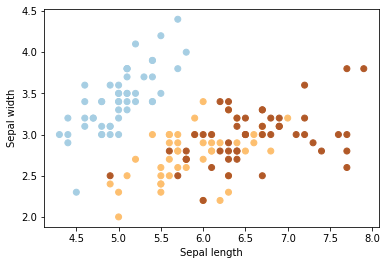

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Training a decision tree

In [17]:
from sklearn import tree
# Here, we define the type of training method (nothing happens yet)
clf = tree.DecisionTreeClassifier()
# Now, we train (fit) the method on the (X,y) dataset
clf.fit(X, y)
# clf **has been changed** and now contains the trained model

DecisionTreeClassifier()

We can visualize the tree as text

In [18]:
text_representation = tree.export_text(clf, feature_names=iris_meta.feature_names)
print(text_representation)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



We can also visualize the tree graphically

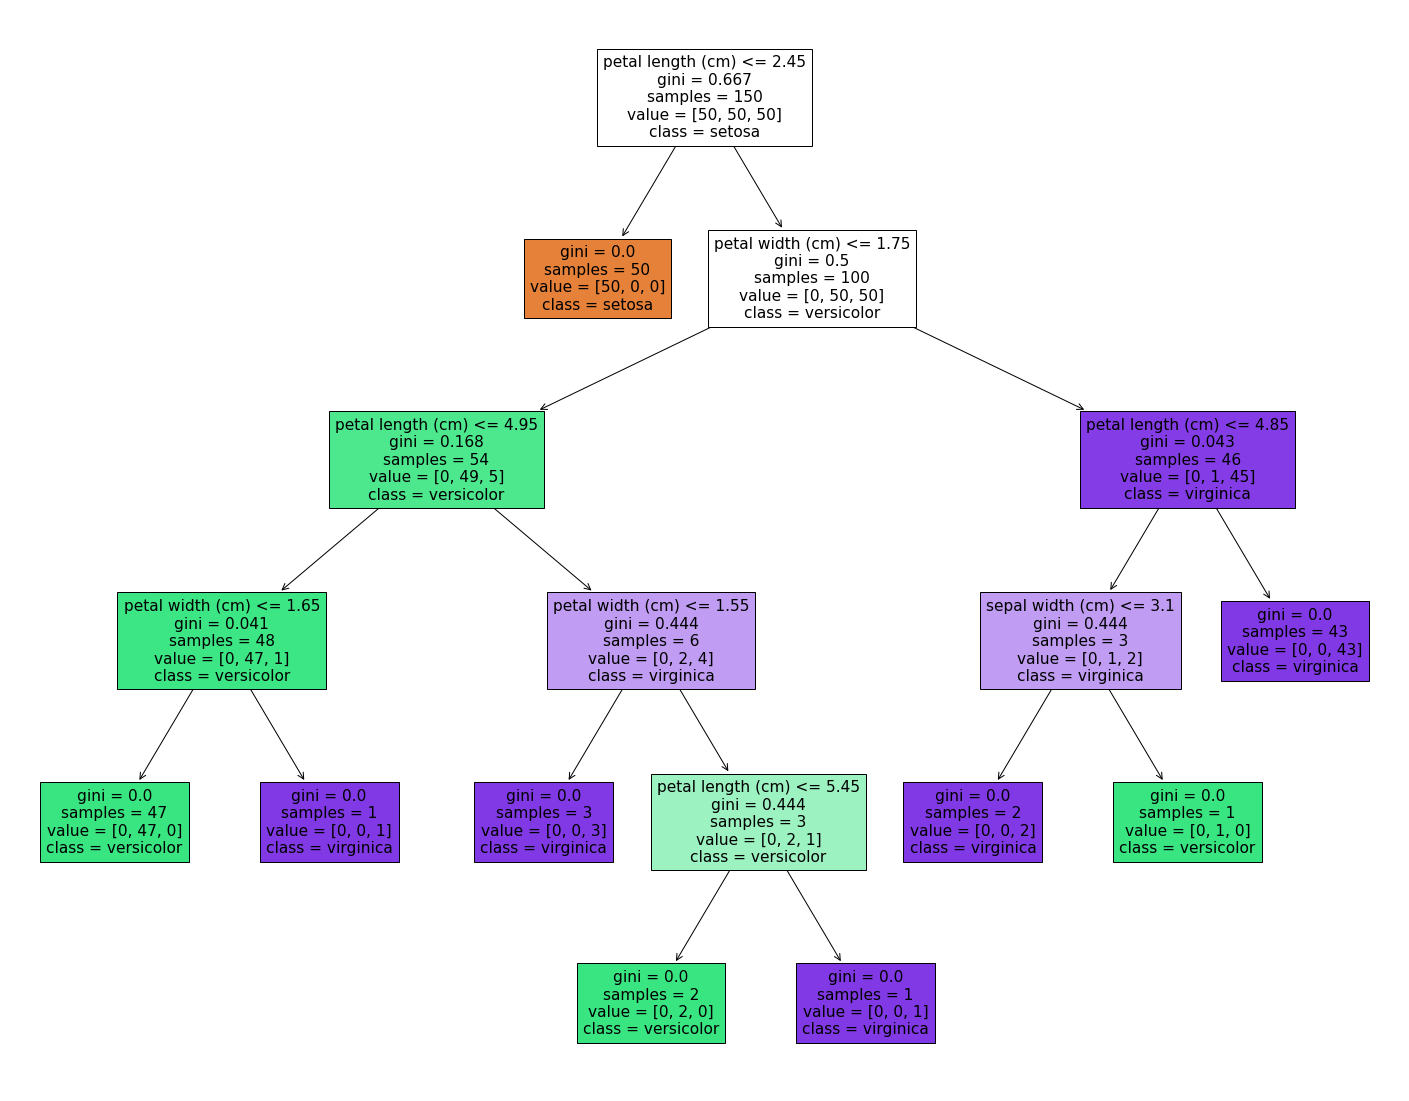

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

# Training and evaluating a decision tree with a test set (holdout)

In [20]:
from sklearn.model_selection import train_test_split

- Now we create the training (X_train, y_train) and testing (X_test, y_test) partitions: 2/3 for training, 1/3 for testing
- Notice the **random_state=42** for reproducibility (important!)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train[0:5]

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ]])

Shape of the training and testing partitions

In [23]:
print(X_train.shape, y_train.shape) # 100 instances for training
print(X_test.shape, y_test.shape)   # 50 instances for testing

(100, 4) (100,)
(50, 4) (50,)


Let's print the five first training instances

In [24]:
print("INPUT FEATURES:")
print(X_train[:5,:])
print("RESPONSE:")
print(y_train[:5])

INPUT FEATURES:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]
RESPONSE:
[1 2 1 0 2]


If we create the partition again, it will be the same as before if we use the same random state

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("INPUT FEATURES:")
print(X_train[:5,:])

INPUT FEATURES:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]


But it will be different if we change the random seed

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)
print("INPUT FEATURES:")
print(X_train[:5,:])

INPUT FEATURES:
[[4.7 3.2 1.3 0.2]
 [4.3 3.  1.1 0.1]
 [5.4 3.9 1.3 0.4]
 [5.5 2.6 4.4 1.2]
 [6.1 2.6 5.6 1.4]]


In [27]:
# Let's keep the original partition (with random state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Now, we train the tree with .fit
- Notice that we use np.random.seed(42) so that the training of the tree is also reproducible (in case that tree training is not deterministic)

In [28]:
from sklearn import metrics
from sklearn import tree

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
clf.fit(X_train, y_train)
# We can see that the tree is inside
print(tree.export_text(clf))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



By the way, we can get help of any function (like .fit)

In [29]:
?clf.fit

Now, we evaluate the tree, by computing predictions on the test set

In [30]:
y_test_pred = clf.predict(X_test)

We can check the predictions for the testing instances

In [31]:
print(y_test_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


For the sake of visualization, we can compare predictions and actual values (ground truth of the response variable). We can see that for the first 5 instances, it is always correct.

In [32]:
print(np.hstack((y_test_pred[:5,np.newaxis], y_test[:5,np.newaxis])))

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


- But, in order to evaluate the model on the test partition, we can compute a metric (classification accuracy in this case)
- It is very high (98%)

In [33]:
from sklearn import metrics
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_tree)

0.98


However, the 0.98 accuracy is the model evaluation (estimation of performance). We still need to compute the final model (the one that will be sent and used by the company) **using all available data**.

In [34]:
final_clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company
# Its estimated accuracy is what we computed before (95%)

DecisionTreeClassifier()

By the way, we can store (and load) this model on a file. This is called "model persistence"

In [35]:
from joblib import dump, load
# Save the final model to a file
dump(final_clf, 'final_tree.joblib') 
# Load the tree from the file
final_clf_reloaded = load('final_tree.joblib') 

Below, you have the complete code

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier()
np.random.seed(42) # reproducibility
# We train it
clf.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)
# We compute accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the tree: {accuracy_tree} ")

# We finally compute the final model with all available data

final_clf = tree.DecisionTreeClassifier()
np.random.seed(42)  # reproducibility
final_clf.fit(X, y)

Accuracy of the tree: 0.98 


DecisionTreeClassifier()

# Exercise: do the fit, predict, model evaluation, and final_model construction  with KNN.

- This one can be used for classification:

from sklearn.neighbors import KNeighborsClassifier

- This one can be used for regression:

from sklearn.neighbors import KNeighborsRegressor



# Training and evaluating a decision tree with crossvalidation

- First, we are going to do crossvalidation with a loop, so that we understand the process better
- However (!!), it is better to do crossvalidation with the cross_val_score function, as we will do later

- KFold creates the training/test crossvalidation folds.
    - shuffle randomly shuffles the data before splitting the folds. We should always do this, unless we have good reasons otherwise
    - random_state makes the shuffling reproducible

In [37]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

- Now, we carry out crossvalidation by going through all 5 folds.
- In every iteration:
    - We train a model on the training folds
    - We compute predictions on the testing folds
    - We compute the metric (accuracy) and store it
- When the crossvalidation loop ends, we compute the average (and std)    

In [38]:
np.random.seed(42) # reproducibility

# This variable will contain the 5 crossvalidation accuracies, one per iteration
scores = []

for train_index, test_index in cv.split(X):
    print(f"TRAIN: {train_index[:5]} ...", f"TEST: {test_index[:5]} ...")
    # Getting the actual training and testing partitions out of the indices
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
  
    # Training the model for this particular crossvalidation iteration
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)  
    
    print("The accuracy for this crossval iteration is: {accuracy_tree}")
    print()
    # We add this accuracy to the list
    scores.append(accuracy_tree)
    
# Transforming scores from list to numpy array (this is just a technicallity)    
scores = np.array(scores)  
print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

TRAIN: [0 1 2 3 4] ... TEST: [ 9 12 18 19 26] ...
The accuracy for this crossval iteration is: {accuracy_tree}

TRAIN: [1 2 3 5 6] ... TEST: [ 0  4 10 11 15] ...
The accuracy for this crossval iteration is: {accuracy_tree}

TRAIN: [0 1 2 3 4] ... TEST: [ 5  7 23 24 25] ...
The accuracy for this crossval iteration is: {accuracy_tree}

TRAIN: [0 1 4 5 7] ... TEST: [ 2  3  6  8 13] ...
The accuracy for this crossval iteration is: {accuracy_tree}

TRAIN: [0 2 3 4 5] ... TEST: [ 1 14 20 21 37] ...
The accuracy for this crossval iteration is: {accuracy_tree}

All the accuracies are: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
And the average crossvalidation accuracy is: 0.95 +- 0.03


- However, before we programmed the loop explicitely, in order to understand what crossvalidation does.
- But crossvalidation is typically done by means of the cross_val_score function, as below

In [39]:
from sklearn.model_selection import cross_val_score, KFold

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier()

# Making model training reproducible
np.random.seed(42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv) 

print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
And the average crossvalidation accuracy is: 0.95 +- 0.03


- 0.95 is the model evaluation (estimation of performance).
- But the final model has to be trained with all available data.

In [40]:
final_clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company
# Its estimated accuracy is what we computed before

DecisionTreeClassifier()

Below, you have the complete code for crossvalidation evaluation (and also obtaining the final model at the end)

In [41]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier()

# Making model training reproducible
np.random.seed(42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv) 

# print(f"All the accuracies are: {scores}")
print(f"The average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

final_clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company

The average crossvalidation accuracy is: 0.95 +- 0.03


DecisionTreeClassifier()

# Changing hyperparameters of a decision tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's see the effect of changing from gini to entropy. We use holdout here. It seems that results are exactly the same.

In [43]:
# This loop checks what happens with the two criterions
for criterion in ["gini", "entropy"]:
    clf = tree.DecisionTreeClassifier(criterion=criterion)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With {criterion}: {accuracy_tree:.2f}")

With gini: 0.98
With entropy: 0.98


Let's see the effects of maximum_depth. "None" represents the maximum possible depth. 

In [44]:
for max_depth in [1,2,3,None]:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With max_depth {max_depth}: {accuracy_tree:.2f}")

With max_depth 1: 0.68
With max_depth 2: 0.98
With max_depth 3: 0.98
With max_depth None: 0.98


It seems that max_depth=2 is enough. Let's visualize a tree with max depth = 2

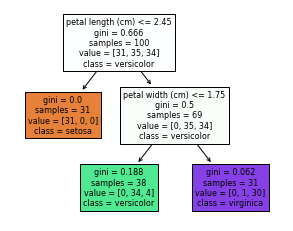

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,4))

clf = tree.DecisionTreeClassifier(max_depth=2)
np.random.seed(42)
clf.fit(X_train,y_train)
    
_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

Let's see the effects of min_samples_split. 2 is the default.

In [46]:
for min_samples in [2,10,20,30]:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_samples_split {min_samples}: {accuracy_tree:.2f}")

With min_samples_split 2: 0.98
With min_samples_split 10: 0.98
With min_samples_split 20: 0.98
With min_samples_split 30: 0.98


Finally, let's check another hyper-parameter called min_impurity_decrease: this means that a new level of the tree is created only if the information gain (that is, the decrease in entropy or gini) is larger than min_impurity_decrease. It is yet another way of controlling tree depth.

In [47]:
for min_impurity_decrease in np.linspace(0,2,num=10):
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_impurity_decrease {min_impurity_decrease}: {accuracy_tree:.2f}")

With min_impurity_decrease 0.0: 0.98
With min_impurity_decrease 0.2222222222222222: 0.98
With min_impurity_decrease 0.4444444444444444: 0.30
With min_impurity_decrease 0.6666666666666666: 0.30
With min_impurity_decrease 0.8888888888888888: 0.30
With min_impurity_decrease 1.1111111111111112: 0.30
With min_impurity_decrease 1.3333333333333333: 0.30
With min_impurity_decrease 1.5555555555555554: 0.30
With min_impurity_decrease 1.7777777777777777: 0.30
With min_impurity_decrease 2.0: 0.30


# Exercise: check the effect of changing hyper-parameter number of neighbors of KNN.

Help about KNN in sklearn:

KNN for classification is:

from sklearn.neighbors import KNeighborsClassifier

It can be defined with:

clf = KNeighborsClassifier()

(and then trained with .fit).

Help for KNN for classification here:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

You can also check what happens when you change hyper-parameter weights, that can have three different values:

- ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

- ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.



# Dealing with categorical variables in DecisionTreeClassifier

- Sklearn implementation of trees CANNOT deal with categorical variables (in most cases).
- They must be converted to dummy variables (one-hot-encoding)
- Sklearn trees cannot deal with missing values either

The typical workflow when working with scikit-learn is:

1. Load data as a Pandas dataframe

2. Do EDA (Exploratory Data Analysis) to understand your data. And this means:
  - How many instances and attributes there are
  - What type of attributes there are (numerical or categorical). This is done to check whether there are categorical features that should be encoded (as dummies / one-hot-encoding)
  - What attributes have missing values, and how many
  - Whether it is a classification or a regression problem (response variable), and in case of classification, whether the class is imbalanced.

3. Encode the Pandas dataframe as a numpy matrix (get rid of categorical values and missing values)

4. Do machine learning with scikit-learn

In [48]:
# This is for uploading tennis.txt from your hard drive into Colab

from google.colab import files
import io
uploaded = files.upload()
tennis_tmp = io.BytesIO(uploaded['tennis.txt'])

ModuleNotFoundError: No module named 'google'

In [103]:
# There are other ways of accessing files from google colab 
# https://neptune.ai/blog/google-colab-dealing-with-files
# Code below allows to mount your google drive and load data directly from GD
# from google.colab import drive
# drive.mount('/content/gdrive')

In [49]:
import pandas as pd
tennis_df = pd.read_csv("tennis.txt", sep=",")

We can check the first instances of sky with head

In [50]:
tennis_df.head()

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


With this dataset is very small, so we can visualize it whole

In [51]:
tennis_df

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [52]:
print('The shape of the data table is:')
print('===============================')
print(tennis_df.shape)
print()

print('The types of the attributes are:')
print('================================')
tennis_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(tennis_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(tennis_df.isnull().mean())


The shape of the data table is:
(14, 5)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sky          14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes

How many missing values per attribute:
Sky            0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

Fraction of missing values per attribute:
Sky            0.0
Temperature    0.0
Humidity       0.0
Windy          0.0
Play           0.0
dtype: float64


Finally, we check whether the response variable is imbalanced. We can see it is not too imbalanced.

In [53]:
print(tennis_df.Play.value_counts())

print()

print(tennis_df['Play'].value_counts())

print()

print(tennis_df['Play'].value_counts()/tennis_df['Play'].count())

yes    9
no     5
Name: Play, dtype: int64

yes    9
no     5
Name: Play, dtype: int64

yes    0.642857
no     0.357143
Name: Play, dtype: float64


Now, we are going to encode:
- Our categorical features (Sky and Windy)
- The response variable (the class: Play)

But first, we will separate the data table into inputs (X) and output (y)

We will use a ColumnTransformer, that allows to process only some particular columns, and leaves the others untouched (passthrough)

In [54]:
y_df = tennis_df['Play']
print(y_df)

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object


In [55]:
X_df = tennis_df.drop('Play', axis=1)
print(X_df)

         Sky  Temperature  Humidity  Windy
0      sunny           85        85  False
1      sunny           80        90   True
2   overcast           83        86  False
3      rainy           70        96  False
4      rainy           68        80  False
5      rainy           65        70   True
6   overcast           64        65   True
7      sunny           72        95  False
8      sunny           69        70  False
9      rainy           75        80  False
10     sunny           75        70   True
11  overcast           72        90   True
12  overcast           81        75  False
13     rainy           71        91   True


We will use now a ColumnTransformer, that allows to process only some particular columns, and leaves the others untouched (passthrough). In this case, we will process only the categorical ones. 
The output of this transformation is a numpy matrix (!!)

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [ 
                    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features)
                    ],
                    remainder='passthrough' 
)

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 7 columnos
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle)

print(X)

(14, 7)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  1.  0. 85. 85.]
 [ 0.  0.  1.  0.  1. 80. 90.]
 [ 1.  0.  0.  1.  0. 83. 86.]
 [ 0.  1.  0.  1.  0. 70. 96.]
 [ 0.  1.  0.  1.  0. 68. 80.]
 [ 0.  1.  0.  0.  1. 65. 70.]
 [ 1.  0.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  1.  0. 72. 95.]
 [ 0.  0.  1.  1.  0. 69. 70.]
 [ 0.  1.  0.  1.  0. 75. 80.]
 [ 0.  0.  1.  0.  1. 75. 70.]
 [ 1.  0.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  1.  0. 81. 75.]
 [ 0.  1.  0.  0.  1. 71. 91.]]


Sometimes it is time consuming to enumerate all categorical columns. We can use make_column_selector / selector in order to select the types we need.

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [ 
                    ('categorical', OneHotEncoder(handle_unknown='ignore'),  selector(dtype_include=["object","bool"]))
                    ],
                    remainder='passthrough' 
)

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 7 columnos
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle)

print(X)

(14, 7)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  1.  0. 85. 85.]
 [ 0.  0.  1.  0.  1. 80. 90.]
 [ 1.  0.  0.  1.  0. 83. 86.]
 [ 0.  1.  0.  1.  0. 70. 96.]
 [ 0.  1.  0.  1.  0. 68. 80.]
 [ 0.  1.  0.  0.  1. 65. 70.]
 [ 1.  0.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  1.  0. 72. 95.]
 [ 0.  0.  1.  1.  0. 69. 70.]
 [ 0.  1.  0.  1.  0. 75. 80.]
 [ 0.  0.  1.  0.  1. 75. 70.]
 [ 1.  0.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  1.  0. 81. 75.]
 [ 0.  1.  0.  0.  1. 71. 91.]]


Now, we need to encode the class into integers. We do that with labelencoder.

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_df)

y = le.transform(y_df)
print(y)

# Actually, it seems that sklearn can use the original y_df, so we could have done y = y_df

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Finally, we just copy the code for evaluating decision trees, and for constructing the final model.
We apply that to our (X,y)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier()
np.random.seed(42) # reproducibility
# We train it
clf.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)
# We compute accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the tree: {accuracy_tree} ")

# We finally compute the final model with all available data

final_clf = tree.DecisionTreeClassifier()
np.random.seed(42)  # reproducibility
final_clf.fit(X, y)

Accuracy of the tree: 0.6 


DecisionTreeClassifier()

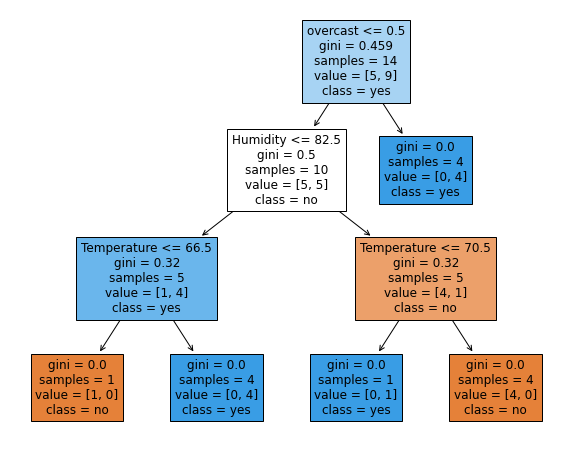

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
    
_ = tree.plot_tree(final_clf, 
                   feature_names = list(sorted(X_df['Sky'].unique())) + list(sorted(X_df['Windy'].unique())) + ['Temperature', 'Humidity'],
                   class_names= list(sorted(y_df.unique())),
                   filled=True)

In [116]:
# !pip install statsmodels

Given that this is a 2-class classification problem, we can construct a confidence interval for the accuracy
We can see it is very inaccurate ...

In [61]:
from statsmodels.stats.proportion import proportion_confint
print(f"Only {len(y_test)} instances on the testing partition")
print(f"Tree accuracy: {accuracy_tree} ")
proportion_confint(len(y_test)* accuracy_tree, len(y_test), method="wilson" )

Only 5 instances on the testing partition
Tree accuracy: 0.6 


(0.2307242812760129, 0.8823792257673522)

# Regression trees with holdout evaluation

Let's load the California housing dataset and check its description. Its data about housing prices depending on the characteristics of the zone**

In [1]:
# The Boston dataset is also included within sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
X = housing.data
y = housing.target
print(X.shape, y.shape)

(20640, 8) (20640,)


The main change is that we use a DecisionTreeRegressor and the metric is now RMSE

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
regr = tree.DecisionTreeRegressor()
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the tree: 0.7389833060012664


Is it better than a trivial regressor?

In [5]:
from sklearn.dummy import DummyRegressor
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test)))

print(f"RMSE of the tree: {rmse_tree}")
print(f"RMSE of dummy(mean): {rmse_mean}")
print(f"RMSE ratio tree/dummy(mean): {rmse_tree/rmse_mean}")

RMSE of the tree: 0.7389833060012664
RMSE of dummy(mean): 1.15439409553007
RMSE ratio tree/dummy(mean): 0.6401482031679511


What about MAE?

In [6]:
mae_tree = metrics.mean_absolute_error(y_test, y_test_pred)

from sklearn.dummy import DummyRegressor
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train, y_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_test))

print(f"MAE of the tree: {mae_tree}")
print(f"MAE of dummy(median): {mae_median}")
print(f"MAE ratio tree/dummy(median): {mae_tree/mae_median}")

MAE of the tree: 0.47762681738109225
MAE of dummy(median): 0.8865130930710511
MAE ratio tree/dummy(median): 0.5387701784826454


The tree would have different levels and may be hard to visualize. Let's visualize one with only four levels

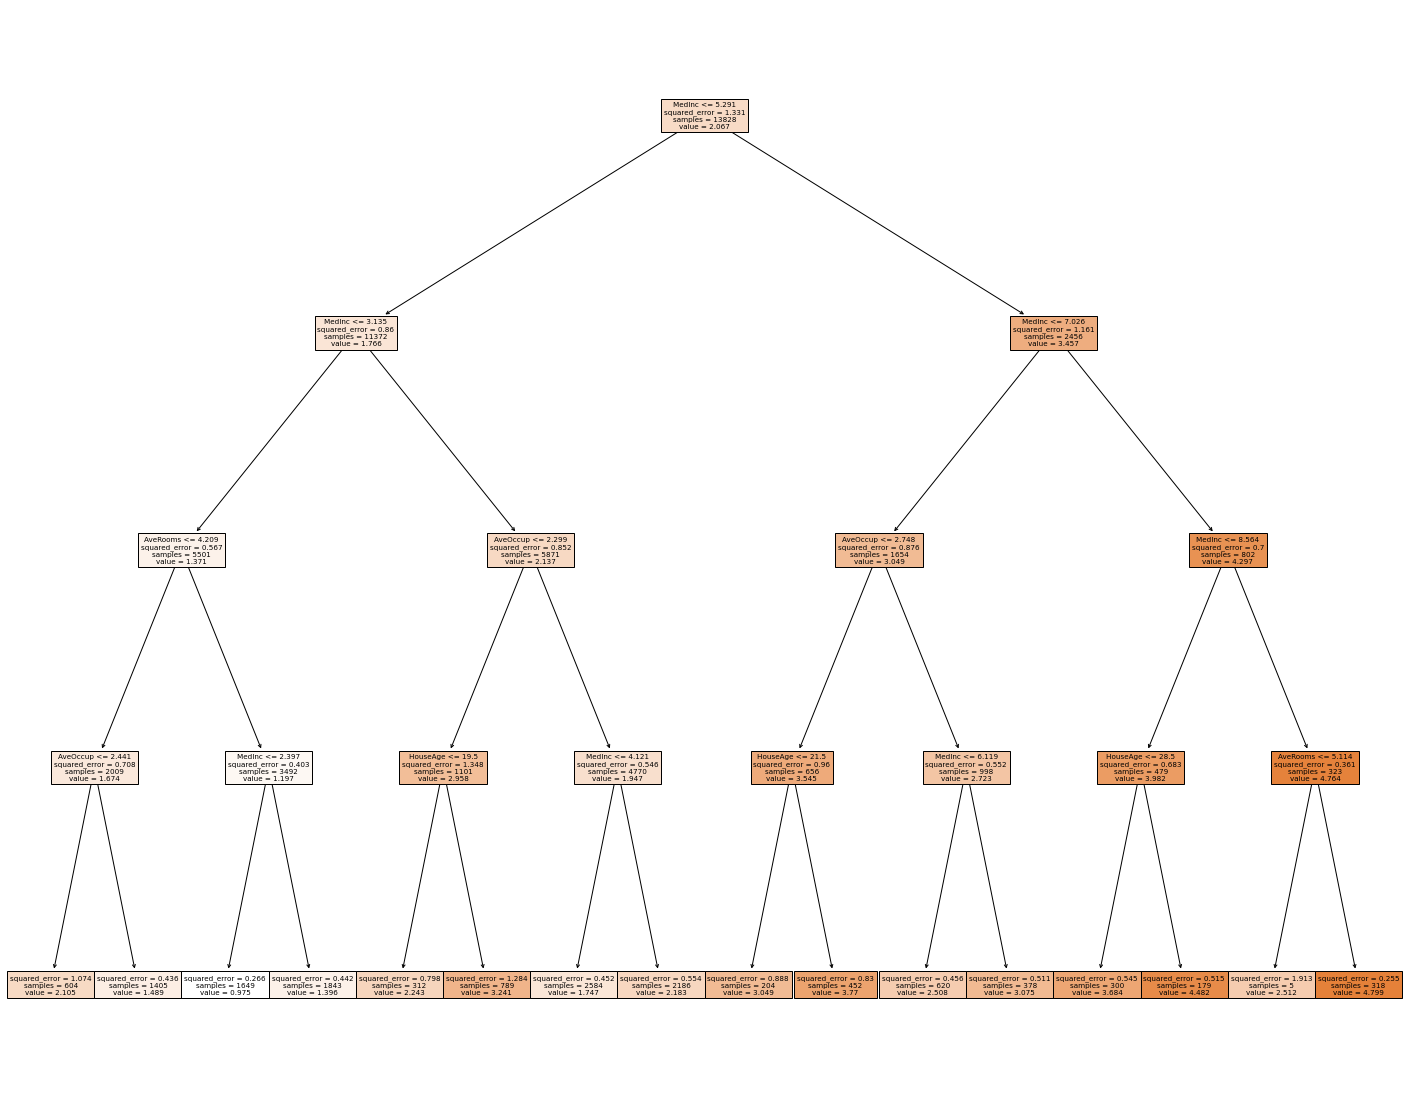

In [9]:
regr = tree.DecisionTreeRegressor(max_depth=4)
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
    
_ = tree.plot_tree(regr,
                   feature_names = housing.feature_names,
                   filled=True)

**Now we train model trees (for regression)**

In [10]:
# More info about this implementation of model trees
# https://towardsdatascience.com/linear-tree-the-perfect-mix-of-linear-model-and-decision-tree-2eaed21936b7
# https://pypi.org/project/linear-tree/

# IMPORTANT: This implementation of Model Trees is able to deal with Categorical Features (whose values are encoded as integers 0,1,2, ...)
# in order to use categorical features, the parameter categorical_features must be used.

In [11]:
# !pip install --upgrade linear-tree
!pip install pydot

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the tree: 0.6016181237439622


The internal nodes of the model tree below:

In [73]:
#import pydot
#regr.plot_model(feature_names=boston_meta.feature_names)

In order to check the linear models at the leaves, we have to follow a longer process. What follows shows the coefficient of the linear model at node 8.

In [14]:
leaves = regr.summary(feature_names=housing.feature_names, only_leaves=True, max_depth=None)

In [15]:
leaves

{7: {'loss': 0.53832, 'samples': 1741, 'models': LinearRegression()},
 8: {'loss': 0.49163, 'samples': 2010, 'models': LinearRegression()},
 9: {'loss': 0.51824, 'samples': 1591, 'models': LinearRegression()},
 10: {'loss': 0.39367, 'samples': 1936, 'models': LinearRegression()},
 4: {'loss': 0.18285, 'samples': 1941, 'models': LinearRegression()},
 11: {'loss': 0.19074, 'samples': 2214, 'models': LinearRegression()},
 12: {'loss': 0.26167, 'samples': 2395, 'models': LinearRegression()}}

In [19]:
from pprint import pprint
model_8_coefs = leaves[8]['models'].coef_
model_8_intercept = leaves[8]['models'].intercept_
pprint(list(zip(housing.feature_names, model_8_coefs)))
pprint(f'intercept: {model_8_intercept}')

[('MedInc', 0.34882656),
 ('HouseAge', 0.004128143),
 ('AveRooms', 0.07103187),
 ('AveBedrms', 1.2432164),
 ('Population', 0.00011047462),
 ('AveOccup', -1.2138903),
 ('Latitude', -0.44142628),
 ('Longitude', -1.0294341)]
'intercept: -104.19413757324219'
